##FASHION CLASSIFICATION

In [4]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
(xtrain,ytrain) , (xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
print((xtrain).shape)
print((ytrain).shape)
print(ytrain[0])

(60000, 28, 28)
(60000,)
9


In [10]:
xtest.shape , ytest.shape

((10000, 28, 28), (10000,))

In [11]:
class_labels = ['T-shirt/top', 'Trouser','Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt', 'Sneaker' , 'Bag' , 'Ankle boot']
#class labels  
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot



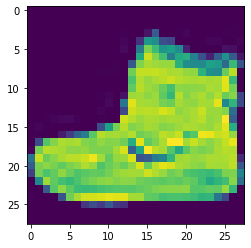

In [12]:
plt.imshow(xtrain[0])

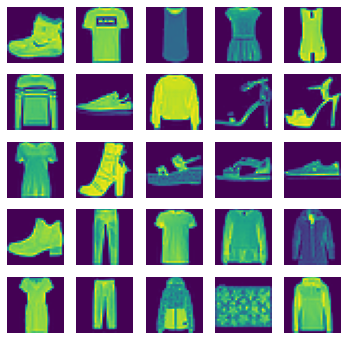

In [14]:
plt.figure(figsize = (6,6))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i])
  plt.axis('off')


##Feature Engineering

In [15]:
xtrain = xtrain/255
xtest = xtest/255

In [17]:
# xtrain[0]

##Building Model

In [21]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras import initializers

initializer = tf.keras.initializers.HeNormal()

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu', kernel_initializer=initializer))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D( 64, (3,3), activation='relu' ))
model.add(MaxPool2D( (2,2) ))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)         

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(xtrain,ytrain,batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 15s 5ms/step - loss: 0.7515 - accuracy: 0.7199 - val_loss: 0.4836 - val_accuracy: 0.8255
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.5077 - accuracy: 0.8161 - val_loss: 0.4530 - val_accuracy: 0.8348
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4503 - accuracy: 0.8340 - val_loss: 0.3897 - val_accuracy: 0.8547
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4148 - accuracy: 0.8468 - val_loss: 0.3671 - val_accuracy: 0.8621
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3878 - accuracy: 0.8578 - val_loss: 0.3617 - val_accuracy: 0.8669
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3676 - accuracy: 0.8654 - val_loss: 0.3663 - val_accuracy: 0.8599
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3556 - accuracy: 0.8695 - val_loss: 0.3435 - val_accuracy: 0.8719
Epoch

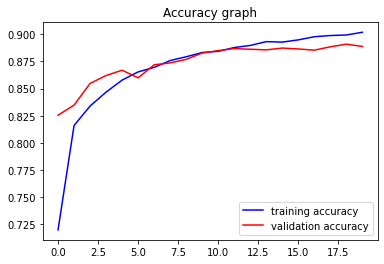

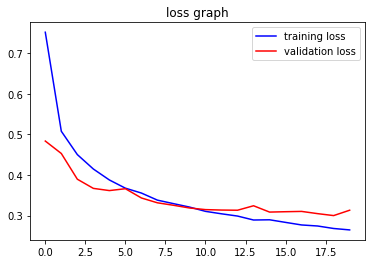

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc, 'b', label = 'training accuracy')
plt.plot(epochs,val_acc, 'r', label = 'validation accuracy')
plt.title('Accuracy graph')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss, 'b', label = 'training loss')
plt.plot(epochs,val_loss, 'r', label = 'validation loss')
plt.title('loss graph')
plt.legend()
plt.show()


In [32]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8817


[0.3391945958137512, 0.8816999793052673]

In [33]:
ypred = model.predict(xtest)

In [34]:
len(ypred)

10000

In [36]:
ypred[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [37]:
np.argmax(ypred[0].round(2))

9

In [38]:
ytest[0]

9

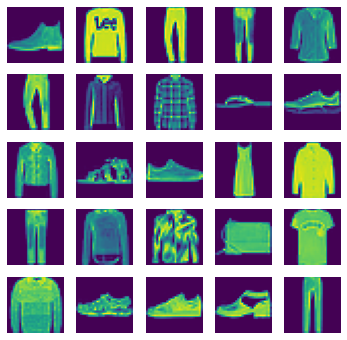

In [41]:
plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtest[i])
  plt.axis('off')


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, [np.argmax(i) for i in ypred] )

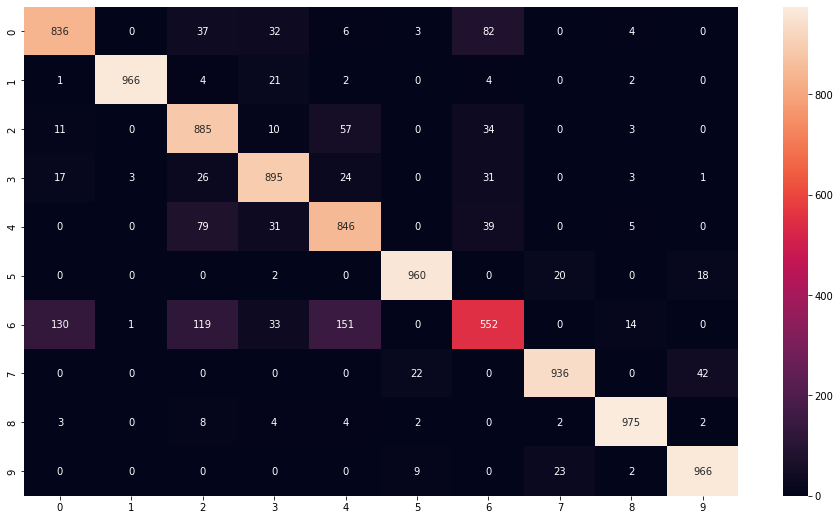

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True , fmt='d')

##Save the model

In [47]:
model.save('fashion_classification_using_cnn.h5')